In [208]:
# Import Packages
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

In [209]:
def parser(s):
    return datetime.strptime(s, "%Y-%m-%d")

In [210]:
# Load Data
data = pd.read_csv('/datc/parcel/notebooks/data/postnl/20201014_300_klanten.csv', parse_dates=[0])

In [211]:
cust_filter = data['cust_id'] == 'klant_266'
date_filter = data['procesdag'].dt.dayofweek <= 4
data = data.where(date_filter & cust_filter).dropna()

data['procesdag']=pd.to_datetime(data['procesdag'])
data = data.set_index(data.procesdag, drop=True)
data = data['2016-01-01':'2018-01-01']

In [212]:
data.head(263)

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column
procesdag,,,,,
2016-01-01,2016-01-01,klant_266,0.0,0.0,train
2016-01-04,2016-01-04,klant_266,172.0,44.0,train
2016-01-05,2016-01-05,klant_266,44.0,54.0,train
2016-01-06,2016-01-06,klant_266,54.0,53.0,train
2016-01-07,2016-01-07,klant_266,53.0,43.0,train
...,...,...,...,...,...
2016-12-28,2016-12-28,klant_266,33.0,39.0,train
2016-12-29,2016-12-29,klant_266,39.0,31.0,train
2016-12-30,2016-12-30,klant_266,31.0,0.0,train


In [213]:
data.drop(['procesdag'], axis='columns', inplace=True)

In [214]:
data.head()

,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column
procesdag,,,,
2016-01-01,klant_266,0.0,0.0,train
2016-01-04,klant_266,172.0,44.0,train
2016-01-05,klant_266,44.0,54.0,train
2016-01-06,klant_266,54.0,53.0,train
2016-01-07,klant_266,53.0,43.0,train


In [215]:
data.drop(['aantal_pakketten_volgende_dag'], axis='columns', inplace=True)

In [216]:
data.head()

,cust_id,aantal_pakketten,validation_column
procesdag,,,
2016-01-01,klant_266,0.0,train
2016-01-04,klant_266,172.0,train
2016-01-05,klant_266,44.0,train
2016-01-06,klant_266,54.0,train
2016-01-07,klant_266,53.0,train


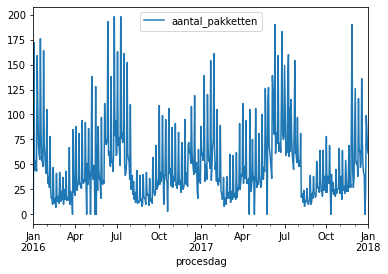

In [217]:
data.plot()

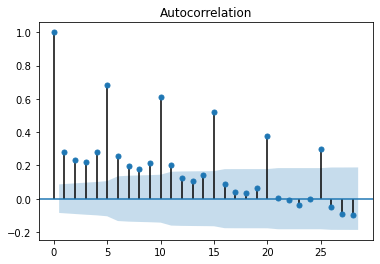

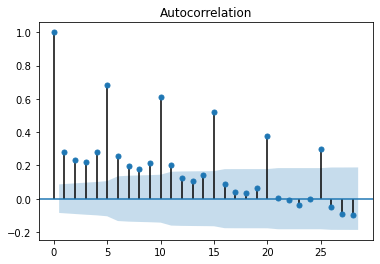

In [218]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['aantal_pakketten'])

In [219]:
data_diff = data['aantal_pakketten'].diff()

In [220]:
data_diff=data_diff[1:]
data_diff.head()

procesdag
2016-01-04    172.0
2016-01-05   -128.0
2016-01-06     10.0
2016-01-07     -1.0
2016-01-08    -10.0
Name: aantal_pakketten, dtype: float64

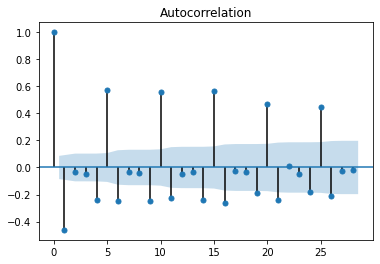

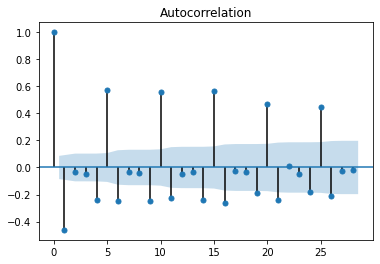

In [221]:
plot_acf(data_diff)

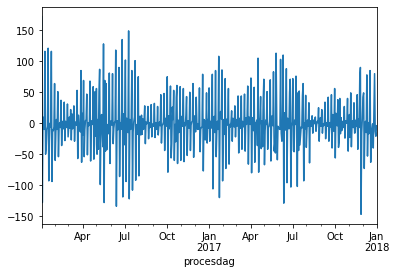

In [222]:
data_diff.plot()

In [223]:
X= data_diff.values #data['aantal_pakketten'].values
train= X [0:500] # 500 data train
test = X[500:] #22 test data
predictions = []



# AR Model


In [224]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar= AR(train)
model_ar_fit=model_ar.fit()

In [225]:
predictions=model_ar_fit.predict(start=499, end=522)

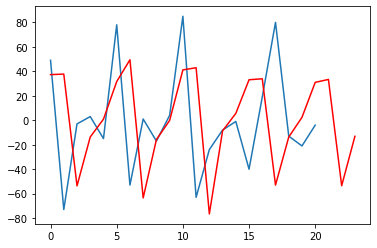

In [226]:
plt.plot(test)
plt.plot(predictions, color= 'red')

# arima

In [227]:
from statsmodels.tsa.arima_model import ARIMA

In [228]:
#model_arima = ARIMA(train,order=(1,1,0))
#model_arima_fit=model_arima.fit()

In [229]:
#predictions=model_arima_fit.predict(start=499, end=522)
#predictions

In [230]:
#plt.plot(test)
#plt.plot(predictions, color= 'red')

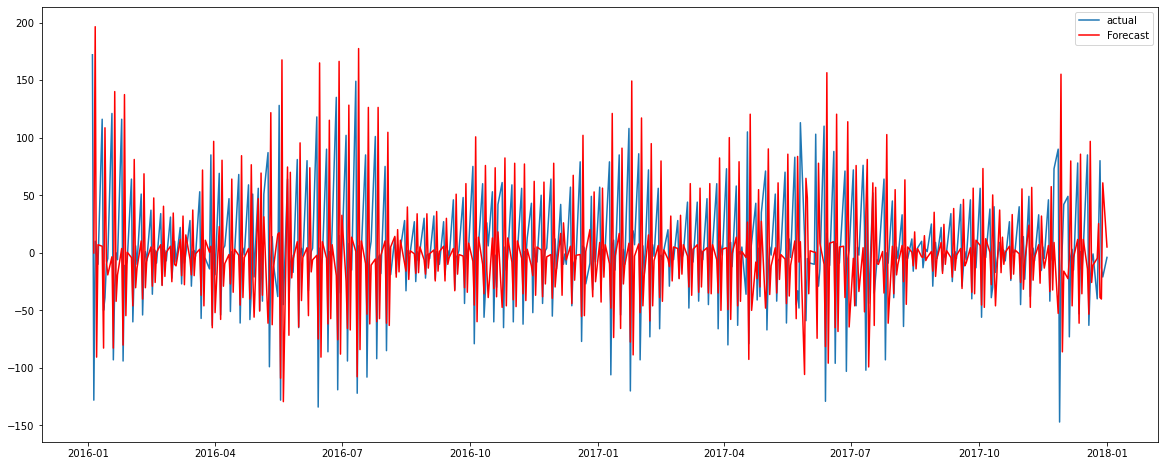

In [231]:
#fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(data_diff, order=(1,1,0))# ARIMA(data['aantal_pakketten'], order=(1,0,0)
ax = plt.gca()
results = model.fit() 
plt.plot(data_diff)#(data['aantal_pakketten']
plt.plot(results.fittedvalues, color='red',alpha=1)
ax.legend(['actual', 'Forecast'])